# TFD D'UN SIGNAL AUDIO AVEC LES BTS2 SN
---


## OBJECTIF :
![Audacity](audacity_logo.png)
##### Le but de cette expérience est de savoir si le piano de ma fille est bien accordée. Pour cela, le 3ème LA a été joué et enregistré <i class="fa fa-microphone" aria-hidden="true"></i> à une fréquence d'échantillonage de 44 kz sur 16 bits grâce au logiciel libre Audacity 
##### Rappelons que cette note correspond à une fréquence de 440 hz.

---
## Mise en place :
Pour parvenir à nos fins, le fichier *piano.wav* se trouve à la racine et nous utiliserons un environnement Python 3.6.


---
## ÉTAPE 1

Nous allons importer les modules et bibliothèques nécessaires au traitement du son, au calcul (TFD) et au tracé de graphique.

- *scipy* pour tout ce qui tourne autour des maths, de l'ingénierie, des sciences en général. Ici, c'est la bibliothèque de traitement de fichiers son qui nous intéresse.
- *numpy* pour le calcul mathématiques (En particulier l'algorithme *Fast Fourier Transform* noté `fft`).
- *matplotlib* pour le tracé de graphiques : pour l'usage en ligne avec les notebooks il faut le spécifier avec la première ligne `%matplotlib inline`.

In [1]:
%matplotlib inline
from scipy.io.wavfile import read
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft

---
## ÉTAPE 2

L'étape suivante consiste en premier lieu à ouvrir notre fichier sonore *piano.wav* avec la fonction `read()`.
Attention, cette fonction retourne pour un fichier sonore deux valeurs : le taux d'échantillonnage **et** les données.

Compléter la cellule de code en remplaçant les *???* et tenant compte des points suivants :

1. La fonction `read(nomdufichier)` retourne deux valeurs :

    - la fréquence d'échantillonnage de l'enregistrement,
    - les échantillons.

   On les affectera simultanément à deux variables que l'on nommera `f_echant` et `donnees`.

2. On récupère la taille du fichier sonore avec la méthode `.size` que l'on affecte à une variable nommée `taille`.
3. La durée du morceau est égale au quotient de la taille par le taux d'échantillonnage.
4. On affichera cette durée.

<i class="fa fa-cog fa-spin fa-3x fa-fw"></i>
<span class="sr-only">Loading...</span>À vous de jouer :

In [14]:
# Lecture du fichier 'Piano2024-16bitsSIGNED-POST' et affectation à deux variables :


# Affectation de la taille des données à la variable 'taille' et affichage de cette taille :


# Calcul de la durée du morceau et affectation à la variable 'duree' :


# Affichage de la taille, de la durée en secondes et de la fréquence d'échantillonnage en hartz :


Maintenant, par curiosité, affichons le contenu de la variable `donnees`:

In [3]:
# Afficher le contenu de 'donnees' :

Que remarquez-vous ?
Que faut-il faire pour avoir un tableau de données exploitable ?

In [13]:
# Boucle pour simplifier les données...


---
## ÉTAPE 3

On souhaite maintenant tracer la représentation **temporelle** du signal audio : c'est à dire la forme d'onde au cours du temps.
Tout d'abord, il faut garder à l'esprit que le son produit par le piano est un signal continu ; en le captant numériquement, Audacity a procédé à un échantillonnage (44 100 Hz sur 32 bits, puis enregistrement sous forme de fichiers sur 16 bits) : cela signifie que des échantillons ont été captés 44 100 fois par seconde !

Donc, sur une seconde, nous avons 44 100 données. Pour simple information, voici un morceau d'un signal audio échantillonnée par Audacity à 44 100 Hz puis 8 000 Hz (zoomé) : l'image est moins dense, il y a moins de données.

<img src="deuxechantillonnages.png" alt="alt text" width="400"/>


Pour notre représentation graphique, et en supposant que notre signal audio a une durée de 10 secondes, cela donne 441 000 données : il est donc inutile de demander l'affichage de 600 000 données... Évident, non ?
On peut afficher 441 000 données ou même moins : on échantillonne donc notre signal (qui a déja été échantillonné par Audacity...).

---
<i class="fa fa-cog fa-spin fa-3x fa-fw"></i>
<span class="sr-only">Loading...</span> **QUESTION**

*Considérons un signal échantillonné à 8 000 Hz. L'échantillonnage nous apporte 48 000 données ou échantillons.*
 
*Quelle est la durée de ce signal ?*



---

### Reprenons notre étude.

Il nous faut un axe des abscisses avec une valeur maximale : celle de la durée du signal. 
Donc il nous faut déterminer la durée de notre signal en utlisant Python.

*Informations :*

   - la fonction `arange(taille)` de *numpy* retourne des valeurs de façon régulière entre 0 et le nombre maximum de données avec un incrément de 1 ;
   - il nous faut un tableau de valeurs `te` contenant les abscisses (temps en secondes) ;
   - `plt.figure(1)` crée une figure numérotée 1 ;
   - `plt.plot(x,y)` trace les points de coordonnées `(x,y` ;
   - `plt.grid(True)`affiche une grille ;
   - `plt.show(1)` affiche la figure 1 complète.
   
<i class="fa fa-cog fa-spin fa-3x fa-fw"></i>
<span class="sr-only">Loading...</span>Compléter le code ci-dessous :

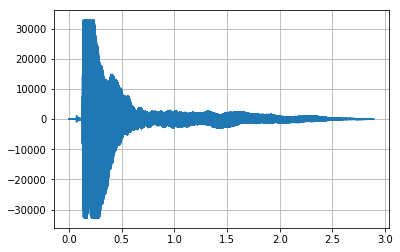

In [5]:
te = np.arange???
plt.figure(1)
plt.plot(???,???)
plt.grid(True)
plt.show(1)

---
## ÉTAPE 4

On souhaite maintenant obtenir la représentation **spectrale** de notre signal qui nous donnera la <span style="color: #26B260">*fondamentale*</span> de notre note et ses <span style="color: #26B260">*harmoniques*</span>...

Pour cela il faut calculer la TFD du signal : on se tourne vers l'algorithme **FFT** (*Fast Fourier Transform*) du module *Numpy*. 

*Cet algorithme prend en paramètres :*
- le début et la fin (en secondes) de la portion étudiée du signal ;
- la fréquence d'échantillonnage du signal ;
- les données du signal.

Nous allons définir une fonction `tracerSpectre()` que nous pourrons appeler quand nous le souhaiterons avec les paramètres cités au-dessus.

In [6]:
def tracerSpectre(donnees,f_echant,debut,duree):
    # le début est un multiple de la fréq. d'échantoillonnage...
    start = int(???)
    # idem pour la fin
    stop = int(???)
    spectre = np.absolute(fft(donnees[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    
    # Valeurs sur l'axe des abscisses
    freq = np.arange(n)*1.0/n*f_echant
    plt.figure(2)
    plt.vlines(freq,[0],spectre,'r')
    plt.xlabel('f (Hz)')
    plt.ylabel('A')
    plt.axis([???])
    plt.grid()
    plt.show(2)

Ensuite, il ne reste plus qu'à appeler notre fonction avec les arguments :
- `donnee` : (en mémoire)
- `f_echant` : (en mémoire)
- `debut` : à choisir (en secondes)
- `duree` : à choisir (en secondes)

<i class="fa fa-cog fa-spin fa-3x fa-fw"></i>
<span class="sr-only">Loading...</span>Appeler notre fonction sur l'intervalle allant de 0 à 2 secondes :

<i class="fa fa-cog fa-spin fa-3x fa-fw"></i>
<span class="sr-only">Loading...</span>**QUESTION :**

Relever la fondamentale du signal et en déduire si le piano est correctement accordée.

Fondamentale : 437,5 Hz or la valeur attendue est 440 Hz... Le piano n'est pas correctement accordée. Ceci dit, certaines marques de pianos *personnalisent* le son de leurs gammes de pianos en choisissant des fréquences légèrement décalées à l'image de certains guitaristes avec leur instrument.

---
## ÉTAPE 5

En reprenant ce qui a été fait, écrire un algorithme **complet** afin d'étudier la même note *La* de ce même piano enregistrée après accordage (nom de fichier : *Piano2024-16bitsSIGNED-POST*) et qui devra : 
 - afficher la représentation temporelle ;
 - afficher la représentation spectrale.


In [10]:
# Votre algorithme


In [12]:
# Appel à la fonction que vou aurez créée


<i class="fa fa-cog fa-spin fa-3x fa-fw"></i>
<span class="sr-only">Loading...</span>**QUESTION :** 

Que pouvons-nous conclure ?


Fondamentale : 435 Hz or la valeur attendue est 440 Hz... Le piano n'est toujours pas correctement accordée, il l'est même de moins en moins au fil du temps.